# Tasks
- Data preparation and data cleaning
- EDA, feature importance analysis
- Model selection process and parameter tuning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

### Data preparation and data cleaning
- column names have the same format
- there are no string values

In [2]:
data = '../Data/heart.csv'
df = pd.read_csv(data)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
round(df.describe(), 3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [5]:
# number of unique values
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [6]:
# check null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# There is one duplicate record --> remove this
df.duplicated().sum()
# Output: 1
df = df.drop_duplicates()
df.duplicated().sum()

0

## EDA, feature importance analysis

#### Target variable analysis

<Axes: xlabel='output', ylabel='Count'>

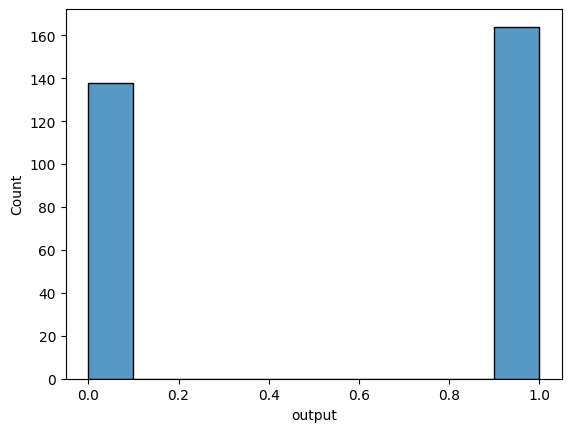

In [8]:
sns.histplot(df.output)

In [9]:
round(df.output.mean(), 3)

0.543

### Feature Importance

In [10]:
# Correlation
corr = df.corrwith(df.output)
abs(corr).sort_values(ascending=False)
#(corr).sort_values(ascending=False)

output      1.000000
exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
dtype: float64

--> 'chol' and 'fbs' seems to be not as important as the others are...

<Axes: >

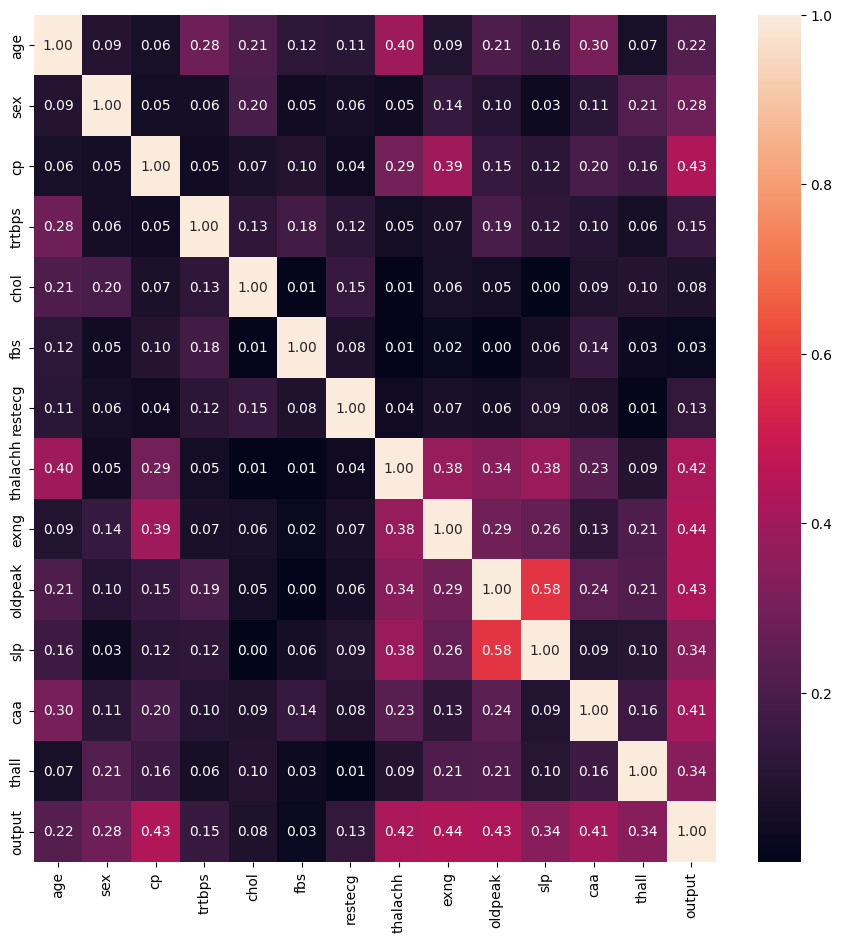

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(abs(df.corr()),fmt='.2f', annot=True)

In [12]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

In [13]:
df[categorical].nunique()

sex        2
cp         4
fbs        2
restecg    3
exng       2
slp        3
thall      4
dtype: int64

In [14]:
female_mean = df[df.sex == 0].output.mean()
female_mean
# Output: 0.75
male_mean = df[df.sex == 1].output.mean()
male_mean
# Output: 0.45

0.44660194174757284

## Data splitting

In [15]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
df_copy = df_copy.sample(frac=1)

df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = (df_train.output).values
y_val = (df_val.output).values

del df_train['output']
del df_val['output']


In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

#categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
#numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

## Training

### Logistic Regression

In [17]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

dv.get_feature_names_out()

array(['age', 'caa', 'chol', 'cp', 'exng', 'fbs', 'oldpeak', 'restecg',
       'sex', 'slp', 'thalachh', 'thall', 'trtbps'], dtype=object)

In [18]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model_1 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_1.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_1.predict_proba(X_val)[:, 1]
y_pred

array([0.67224067, 0.92466735, 0.94437805, 0.67401839, 0.00600215,
       0.83343485, 0.46144321, 0.95807729, 0.78432125, 0.49721788,
       0.65555828, 0.43378554, 0.92891041, 0.64665525, 0.56345875,
       0.7676809 , 0.64707863, 0.21520214, 0.55527846, 0.97765213,
       0.93157208, 0.90743255, 0.7776067 , 0.18231302, 0.54025733,
       0.95542286, 0.31167607, 0.4323127 , 0.20760505, 0.01291884,
       0.93766803, 0.70798048, 0.11899195, 0.53663095, 0.90888904,
       0.73284041, 0.78037497, 0.15636607, 0.40828452, 0.19112973,
       0.83524317, 0.06537106, 0.78045875, 0.00896472, 0.46581138,
       0.83025657, 0.52047865, 0.07991192, 0.83426603, 0.73162907,
       0.81317314, 0.62418494, 0.04764539, 0.80803787, 0.71774161,
       0.92295708, 0.05657262, 0.93136222, 0.33291955, 0.12095113,
       0.93208257])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Performance of LogisticRegression_model_1:

score = y_pred >= 0.5
acc_LogisticRegression_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_1)
# Output: 0.86885

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_1)
# Output: 0.94024

acc:   0.86885
roc:   0.94024


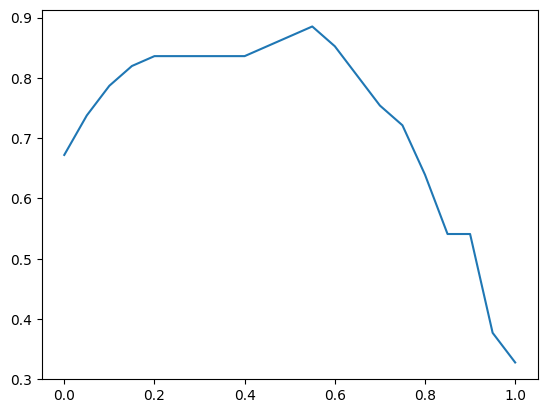

In [21]:
thresholds = np.linspace(0, 1, 21)
accuricies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuricies.append(acc)

plt.plot(thresholds, accuricies)

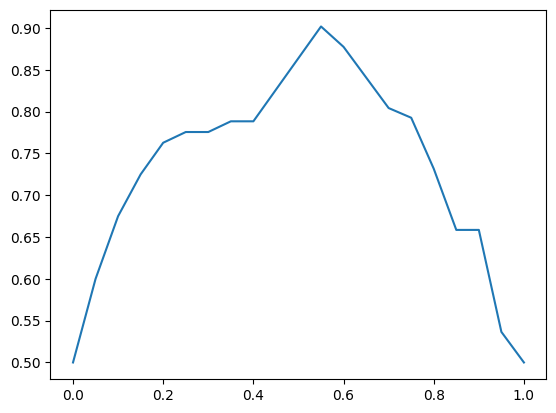

In [22]:
thresholds = np.linspace(0, 1, 21)
roc_auc_scores = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    roc_auc_scores.append(score)

plt.plot(thresholds, roc_auc_scores)

In [24]:
# setting threshold to 0.55 should be even a bit better than 0.5

# Performance of LogisticRegression_model_1:
score = y_pred >= 0.55
#accuracy_score(y_val, score)
acc_LogisticRegression_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_1)
# Output: 0.88525

roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_1)
# Output: 0.94024

acc:   0.88525
roc:   0.94024


#### Logistic Regression - Different model (smaller)
- I've seen that 'chol' and 'fbs' seems to be not as important as the others, so let's try a smaller model without both.

In [30]:
categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

LogisticRegression_model_2 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_2.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_2.predict_proba(X_val)[:, 1]


# Performance of LogisticRegression_model_2:

score = y_pred >= 0.60
#accuracy_score(y_val, score)
acc_LogisticRegression_model_2 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_2)
# Output: 0.86885

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_2 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_2)
# Output: 0.94024

acc:   0.86885
roc:   0.94024


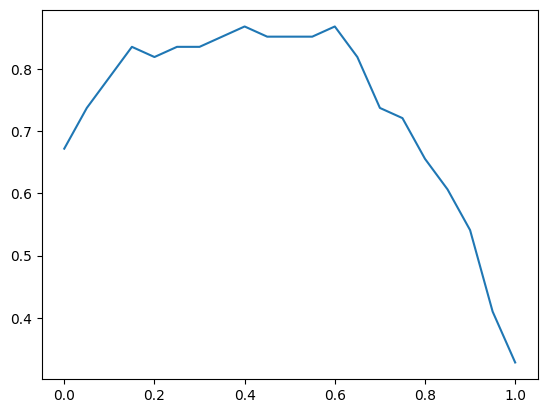

In [31]:
thresholds = np.linspace(0, 1, 21)
accuricies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuricies.append(acc)

plt.plot(thresholds, accuricies)

#### Logistic Regression - Different model (only 9 features)
- There are two more features with a lower importance, so let's try a smaller model without both.

In [32]:
categorical = ['sex', 'cp', 'exng', 'slp', 'thall']
numerical = ['age', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

LogisticRegression_model_3 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_3.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_3.predict_proba(X_val)[:, 1]

# Performance of LogisticRegression_model_3:

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_LogisticRegression_model_3 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_3)
# Output: 0.80328

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_3 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_3)
# Output: 0.90632

acc:   0.85246
roc:   0.93049


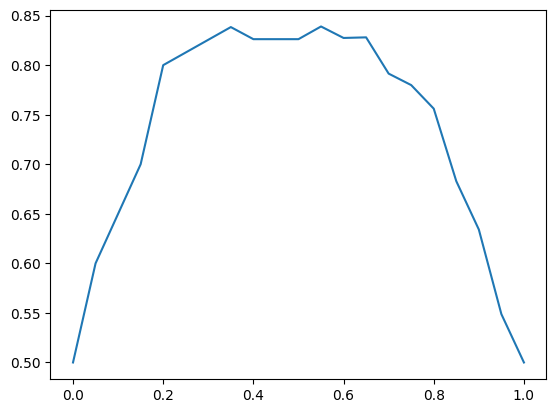

In [33]:
thresholds = np.linspace(0, 1, 21)
roc_auc_scores = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    roc_auc_scores.append(score)

plt.plot(thresholds, roc_auc_scores)

In [35]:
# setting threshold to 0.55 should be slightly better than 0.5
score = y_pred >= 0.55
#accuracy_score(y_val, score)
acc_LogisticRegression_model_3 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_3)
# Output: 0.85246

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_3 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_3)
# Output: 0.93049

acc:   0.85246
roc:   0.93049


#### Logistic Regression - Parameter tuning (K-fold cross-validation)
I'll go with the second model and do some parameter tuning.

#### Tuning the C-value

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']
#categorical = ['sex', 'cp', 'exng', 'slp', 'thall']
#numerical = ['age', 'thalachh', 'oldpeak', 'caa']
features = categorical + numerical

def train(df_train, y_train, C):
    train_dict = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', random_state=1, C=C)
    model.fit(X_train,y_train)

    return dv, model

def predict(df_pred, dv, model):
    pred_dict = df_pred[features].to_dict(orient='records')
    X_pred = dv.transform(pred_dict)
    y_pred = model.predict_proba(X_pred)[:, 1]

    return y_pred
    

In [37]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.4, 0.5, 0.6, 1, 5, 10]:
    auc_scores = []
    accuracies = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.output.values
        y_val = df_val.output.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc_score)

        score = y_pred >= 0.5
        accuracy = accuracy_score(y_val, score)
        accuracies.append(accuracy)
    
    print('C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))


C=0.001, auc_score=0.745 +- 0.077, accuracy=0.664 +- 0.083
C=0.01, auc_score=0.843 +- 0.051, accuracy=0.751 +- 0.063
C=0.1, auc_score=0.897 +- 0.026, accuracy=0.830 +- 0.046
C=0.4, auc_score=0.898 +- 0.028, accuracy=0.834 +- 0.037
C=0.5, auc_score=0.896 +- 0.028, accuracy=0.834 +- 0.037
C=0.6, auc_score=0.897 +- 0.029, accuracy=0.834 +- 0.037
C=1, auc_score=0.896 +- 0.028, accuracy=0.834 +- 0.026
C=5, auc_score=0.893 +- 0.023, accuracy=0.826 +- 0.025
C=10, auc_score=0.889 +- 0.021, accuracy=0.826 +- 0.025


The following configuration seems to be the best:
- C=0.1, auc_score=0.897 +- 0.026, accuracy=0.830 +- 0.046
- C=0.4, auc_score=0.898 +- 0.028, accuracy=0.834 +- 0.037
- C=0.6, auc_score=0.897 +- 0.029, accuracy=0.834 +- 0.037

#### Tuning the number of folds

In [38]:
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.4, 0.5, 0.6, 1, 5, 10]:
    auc_scores = []
    accuracies = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.output.values
        y_val = df_val.output.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc_score)

        score = y_pred >= 0.5
        accuracy = accuracy_score(y_val, score)
        accuracies.append(accuracy)
    
    print('C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

C=0.001, auc_score=0.747 +- 0.093, accuracy=0.672 +- 0.100
C=0.01, auc_score=0.851 +- 0.074, accuracy=0.767 +- 0.090
C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
C=0.4, auc_score=0.906 +- 0.053, accuracy=0.850 +- 0.090
C=0.5, auc_score=0.904 +- 0.054, accuracy=0.850 +- 0.090
C=0.6, auc_score=0.904 +- 0.054, accuracy=0.850 +- 0.090
C=1, auc_score=0.905 +- 0.052, accuracy=0.850 +- 0.096
C=5, auc_score=0.904 +- 0.053, accuracy=0.842 +- 0.100
C=10, auc_score=0.905 +- 0.052, accuracy=0.846 +- 0.095


In [39]:
for nfold in [2, 3, 5, 7, 9, 10, 15, 20]:
    kfold = KFold(n_splits=nfold, shuffle=True, random_state=1)

    for C in [0.1, 0.4, 0.5, 0.6]:
        auc_scores = []
        accuracies = []

        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.output.values
            y_val = df_val.output.values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc_score = roc_auc_score(y_val, y_pred)
            auc_scores.append(auc_score)

            score = y_pred >= 0.5
            accuracy = accuracy_score(y_val, score)
            accuracies.append(accuracy)
        
        print('nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

nfold=2, C=0.1, auc_score=0.886 +- 0.010, accuracy=0.830 +- 0.020
nfold=2, C=0.4, auc_score=0.885 +- 0.008, accuracy=0.838 +- 0.020
nfold=2, C=0.5, auc_score=0.885 +- 0.006, accuracy=0.834 +- 0.024
nfold=2, C=0.6, auc_score=0.885 +- 0.005, accuracy=0.834 +- 0.024
nfold=3, C=0.1, auc_score=0.899 +- 0.010, accuracy=0.830 +- 0.012
nfold=3, C=0.4, auc_score=0.897 +- 0.017, accuracy=0.842 +- 0.031
nfold=3, C=0.5, auc_score=0.895 +- 0.017, accuracy=0.838 +- 0.027
nfold=3, C=0.6, auc_score=0.895 +- 0.017, accuracy=0.838 +- 0.027
nfold=5, C=0.1, auc_score=0.897 +- 0.026, accuracy=0.830 +- 0.046
nfold=5, C=0.4, auc_score=0.898 +- 0.028, accuracy=0.834 +- 0.037
nfold=5, C=0.5, auc_score=0.896 +- 0.028, accuracy=0.834 +- 0.037
nfold=5, C=0.6, auc_score=0.897 +- 0.029, accuracy=0.834 +- 0.037
nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
nfold=7, C=0.4, auc_score=0.906 +- 0.045, accuracy=0.838 +- 0.037
nfold=7, C=0.5, auc_score=0.906 +- 0.044, accuracy=0.838 +- 0.037
nfold=7, C

Best fold:
- nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039

#### Tuning max_iter

In [40]:
def train(df_train, y_train, C, max_iter, n_jobs=-1):
    train_dict = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', random_state=1, C=C, max_iter=max_iter, n_jobs=n_jobs)
    model.fit(X_train,y_train)

    return dv, model

In [41]:
for max_i in [50, 100, 250, 500, 1000, 5000, 10000]:
    for nfold in [7, 10]:
        kfold = KFold(n_splits=nfold, shuffle=True, random_state=1)

        for C in [0.1]:
            auc_scores = []
            accuracies = []

            for train_idx, val_idx in kfold.split(df_full_train):
                df_train = df_full_train.iloc[train_idx]
                df_val = df_full_train.iloc[val_idx]

                y_train = df_train.output.values
                y_val = df_val.output.values

                dv, model = train(df_train, y_train, C=C, max_iter=max_i, n_jobs=1)
                y_pred = predict(df_val, dv, model)

                auc_score = roc_auc_score(y_val, y_pred)
                auc_scores.append(auc_score)

                score = y_pred >= 0.5
                accuracy = accuracy_score(y_val, score)
                accuracies.append(accuracy)
            
            print('max_iter=%s, nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (max_i, nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

max_iter=50, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=50, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=100, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=100, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=250, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=250, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=500, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=500, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=1000, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=1000, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=5000, nfold=7, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039
max_iter=5000, nfold=10, C=0.1, auc_score=0.906 +- 0.055, accuracy=0.834 +- 0.079
max_iter=10000, nfold=7, C=0.1, 

In [42]:
kfold = KFold(n_splits=7, shuffle=True, random_state=1)
max_i = 50
C = 0.1

auc_scores = []
accuracies = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.output.values
    y_val = df_val.output.values

    dv, model = train(df_train, y_train, C=C, max_iter=max_i, n_jobs=1)
    y_pred = predict(df_val, dv, model)

    auc_score = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc_score)

    score = y_pred >= 0.5
    accuracy = accuracy_score(y_val, score)
    accuracies.append(accuracy)
                
print('max_iter=%s, nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (max_i, nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))        

max_iter=50, nfold=10, C=0.1, auc_score=0.907 +- 0.045, accuracy=0.834 +- 0.039


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dt_1 = DecisionTreeClassifier(random_state=1)
dt_1.fit(X_train, y_train)
y_pred = dt_1.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_DecisionTree_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_DecisionTree_model_1)
# Output: 0.82353

#roc_auc_score(y_val, y_pred)
roc_DecisionTree_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_DecisionTree_model_1)
# Output: 0.83509

acc:   0.82353
roc:   0.83509


#### Decision Tree - Tuning

In [45]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt_2 = DecisionTreeClassifier(max_depth=depth)

    dt_2.fit(X_train, y_train)
    y_pred = dt_2.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))


   1 -> 0.702
   2 -> 0.767
   3 -> 0.846
   4 -> 0.923
   5 -> 0.900
   6 -> 0.860
  10 -> 0.835
  15 -> 0.861
  20 -> 0.835
None -> 0.861


In [46]:
for depth in [3, 4, 5]:
    print('depth: %s' % depth)
    for min_samples in [1, 5, 10, 15, 20, 50, 100]:
        dt_2 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples)

        dt_2.fit(X_train, y_train)
        y_pred = dt_2.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        print('%4s -> %.3f' % (min_samples, auc))

depth: 3
   1 -> 0.846
   5 -> 0.863
  10 -> 0.867
  15 -> 0.867
  20 -> 0.849
  50 -> 0.696
 100 -> 0.518
depth: 4
   1 -> 0.923
   5 -> 0.889
  10 -> 0.868
  15 -> 0.868
  20 -> 0.861
  50 -> 0.696
 100 -> 0.518
depth: 5
   1 -> 0.900
   5 -> 0.888
  10 -> 0.851
  15 -> 0.868
  20 -> 0.863
  50 -> 0.696
 100 -> 0.518


In [47]:
dt_3 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1)

dt_3.fit(X_train, y_train)
y_pred = dt_3.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.9228070175438596

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

rf_1 = RandomForestClassifier(n_estimators=3, random_state=1)
rf_1.fit(X_train, y_train)

y_pred = rf_1.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_RandomForest_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_RandomForest_model_1)
# Output: 0.91667

#roc_auc_score(y_val, y_pred)
roc_RandomForest_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_RandomForest_model_1)
# Output: 0.98571

acc:   0.82353
roc:   0.87193


#### Random Forest - Tuning

depth: 5
10 -> 0.849
20 -> 0.898
30 -> 0.874
40 -> 0.881
50 -> 0.884
60 -> 0.884
70 -> 0.888
80 -> 0.888
90 -> 0.888
100 -> 0.881
110 -> 0.884
120 -> 0.884
130 -> 0.884
140 -> 0.881
150 -> 0.881
160 -> 0.877
170 -> 0.888
180 -> 0.888
190 -> 0.884
200 -> 0.891

depth: 10
10 -> 0.865
20 -> 0.888
30 -> 0.884
40 -> 0.874
50 -> 0.875
60 -> 0.877
70 -> 0.874
80 -> 0.874
90 -> 0.874
100 -> 0.881
110 -> 0.881
120 -> 0.877
130 -> 0.881
140 -> 0.879
150 -> 0.879
160 -> 0.879
170 -> 0.877
180 -> 0.884
190 -> 0.882
200 -> 0.881

depth: 20
10 -> 0.861
20 -> 0.889
30 -> 0.877
40 -> 0.877
50 -> 0.874
60 -> 0.872
70 -> 0.874
80 -> 0.877
90 -> 0.877
100 -> 0.881
110 -> 0.881
120 -> 0.881
130 -> 0.881
140 -> 0.881
150 -> 0.882
160 -> 0.881
170 -> 0.881
180 -> 0.884
190 -> 0.884
200 -> 0.881



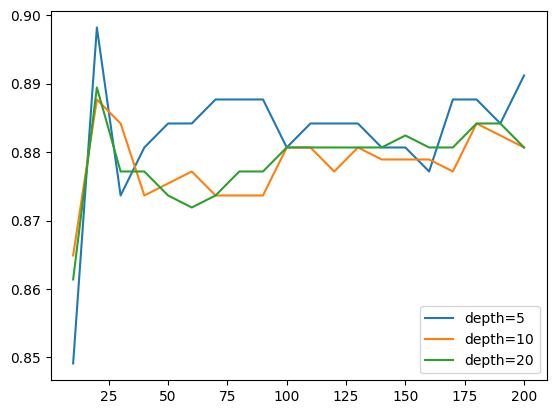

In [49]:
auc_scores = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    auc_scores[depth] = aucs
    print()

num_trees = list(range(10, 201, 10))
plt.plot(num_trees, auc_scores[5], label='depth=5')
plt.plot(num_trees, auc_scores[10], label='depth=10')
plt.plot(num_trees, auc_scores[20], label='depth=20')
plt.legend()

min_samples: 3
10 -> 0.898
20 -> 0.912
30 -> 0.902
40 -> 0.905
50 -> 0.905
60 -> 0.905
70 -> 0.902
80 -> 0.902
90 -> 0.905
100 -> 0.898
110 -> 0.898
120 -> 0.895
130 -> 0.895
140 -> 0.891
150 -> 0.891
160 -> 0.895
170 -> 0.895
180 -> 0.895
190 -> 0.895
200 -> 0.898

min_samples: 5
10 -> 0.895
20 -> 0.909
30 -> 0.905
40 -> 0.909
50 -> 0.909
60 -> 0.905
70 -> 0.902
80 -> 0.898
90 -> 0.905
100 -> 0.898
110 -> 0.902
120 -> 0.902
130 -> 0.902
140 -> 0.898
150 -> 0.898
160 -> 0.898
170 -> 0.898
180 -> 0.898
190 -> 0.898
200 -> 0.898

min_samples: 10
10 -> 0.867
20 -> 0.891
30 -> 0.898
40 -> 0.898
50 -> 0.895
60 -> 0.895
70 -> 0.895
80 -> 0.895
90 -> 0.898
100 -> 0.898
110 -> 0.898
120 -> 0.902
130 -> 0.905
140 -> 0.902
150 -> 0.905
160 -> 0.905
170 -> 0.905
180 -> 0.905
190 -> 0.905
200 -> 0.905



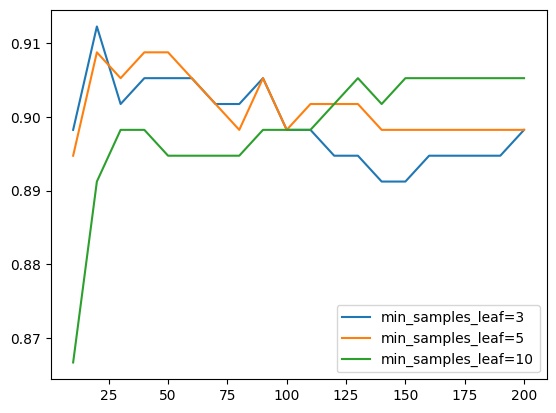

In [50]:
auc_scores = {}

for min_samples in [3, 5, 10]:
    print('min_samples: %s' % min_samples)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=5, min_samples_leaf=min_samples, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    auc_scores[min_samples] = aucs
    print()

num_trees = list(range(10, 201, 10))
plt.plot(num_trees, auc_scores[3], label='min_samples_leaf=3')
plt.plot(num_trees, auc_scores[5], label='min_samples_leaf=5')
plt.plot(num_trees, auc_scores[10], label='min_samples_leaf=10')
plt.legend()

#### Random Forest - Best model

In [51]:
rf_2 = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=3, random_state=1)
rf_2.fit(X_train, y_train)

y_pred = rf_2.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_RandomForest_model_2 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_RandomForest_model_2)
# Output: 0.83333

#roc_auc_score(y_val, y_pred)
roc_RandomForest_model_2 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_RandomForest_model_2)
# Output: 0.97143

acc:   0.85294
roc:   0.91228


### XGBoost

In [69]:
#!pip install xgboost
import xgboost as xgb

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': -1,
    'seed': 1,
    #'silent': 1
}

xgb_model_1 = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = xgb_model_1.predict(dval)

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_xgb_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_xgb_model_1)
# Output: 0.82353

#roc_auc_score(y_val, y_pred)
roc_xgb_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_xgb_model_1)
# Output: 0.88772

acc:   0.82353
roc:   0.88772


#### XGBoost - Tuning

In [70]:
scores = {}

In [71]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [73]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    #'silent': 1
}

xgb_model_2 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=101,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.94444	val-auc:0.92807
[10]	train-auc:0.99895	val-auc:0.89123
[20]	train-auc:1.00000	val-auc:0.89474
[30]	train-auc:1.00000	val-auc:0.88070
[40]	train-auc:1.00000	val-auc:0.87719
[50]	train-auc:1.00000	val-auc:0.87368
[60]	train-auc:1.00000	val-auc:0.87368
[70]	train-auc:1.00000	val-auc:0.88421
[80]	train-auc:1.00000	val-auc:0.88070
[90]	train-auc:1.00000	val-auc:0.87719
[100]	train-auc:1.00000	val-auc:0.87368


In [74]:
%%capture output
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

xgb_model_2 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=101,
                  evals=watchlist, verbose_eval=10)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

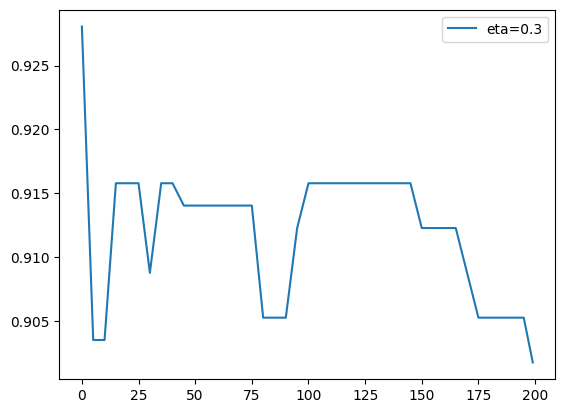

In [75]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

##### XGBoost - Tuning eta

In [76]:
scores = {}

In [77]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [78]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [79]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [80]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [81]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

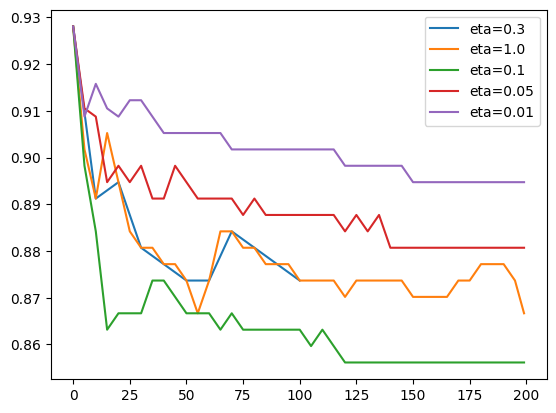

In [68]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

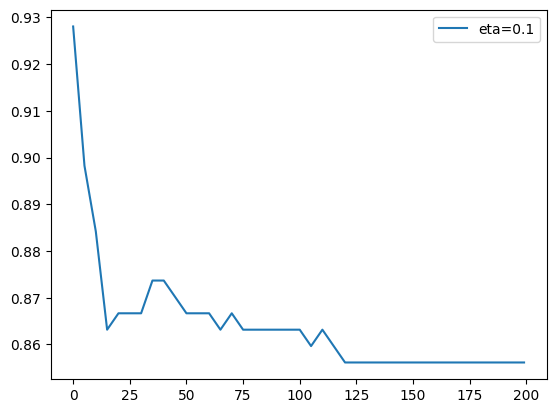

In [82]:
etas = ['eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

eta=0.1 seems to be the best. We take this as set value and tune the next one.

##### XGBoost - Tuning max_depth

In [83]:
scores = {}

In [84]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [85]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [87]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

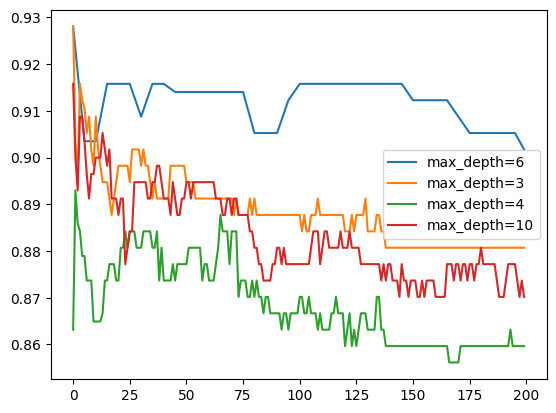

In [88]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

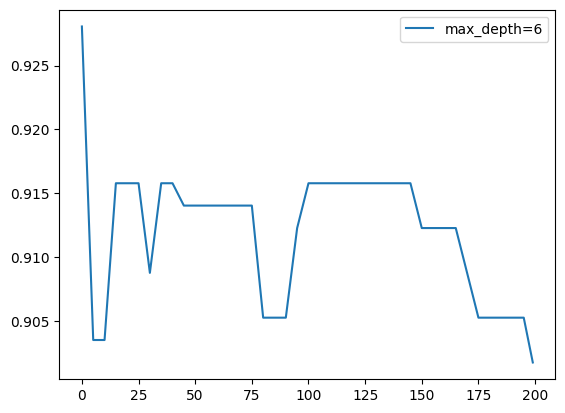

In [89]:
max_depths = ['max_depth=6']
for max_depth in max_depths:
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

###### max_depth=6 is the best.

##### XGBoost - Tuning min_child_weight

In [90]:
scores = {}

In [91]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

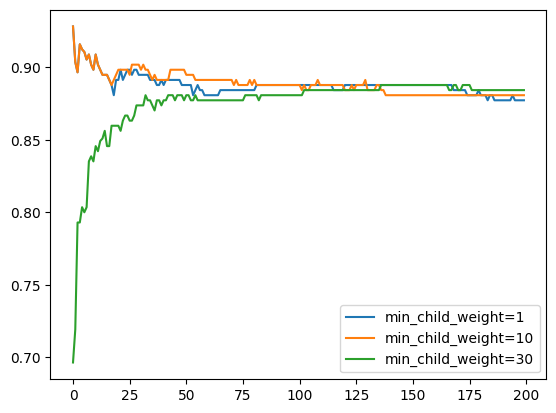

In [95]:
min_child_weights = ['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30']
#min_child_weights = ['min_child_weight=10']
for min_child_weight in min_child_weights:
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

In [100]:
categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_5 = xgb.train(xgb_params, dtrain, num_boost_round=141,evals=watchlist,
                  verbose_eval=5)

[0]	train-auc:0.82198	val-auc:0.69649
[5]	train-auc:0.89698	val-auc:0.80000
[10]	train-auc:0.93137	val-auc:0.84561
[15]	train-auc:0.93625	val-auc:0.84561
[20]	train-auc:0.93807	val-auc:0.85965
[25]	train-auc:0.93731	val-auc:0.86316
[30]	train-auc:0.93779	val-auc:0.87368
[35]	train-auc:0.93865	val-auc:0.87368
[40]	train-auc:0.93922	val-auc:0.87719
[45]	train-auc:0.93903	val-auc:0.87719
[50]	train-auc:0.93894	val-auc:0.88070
[55]	train-auc:0.93913	val-auc:0.87719
[60]	train-auc:0.93865	val-auc:0.87719
[65]	train-auc:0.93855	val-auc:0.87719
[70]	train-auc:0.93884	val-auc:0.87719
[75]	train-auc:0.93846	val-auc:0.87719
[80]	train-auc:0.93932	val-auc:0.88070
[85]	train-auc:0.94004	val-auc:0.88070
[90]	train-auc:0.94004	val-auc:0.88070
[95]	train-auc:0.93985	val-auc:0.88070
[100]	train-auc:0.93994	val-auc:0.88070
[105]	train-auc:0.94013	val-auc:0.88421
[110]	train-auc:0.93966	val-auc:0.88421
[115]	train-auc:0.93937	val-auc:0.88421
[120]	train-auc:0.93966	val-auc:0.88421
[125]	train-auc:0.9397

In [105]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    #'silent': 1
}

xgb_model_6 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=137,
                  evals=watchlist, verbose_eval=1)

[0]	train-auc:0.82198	val-auc:0.69649
[1]	train-auc:0.83994	val-auc:0.71930
[2]	train-auc:0.89382	val-auc:0.79298
[3]	train-auc:0.89468	val-auc:0.79298
[4]	train-auc:0.91001	val-auc:0.80351
[5]	train-auc:0.89698	val-auc:0.80000
[6]	train-auc:0.91001	val-auc:0.80351
[7]	train-auc:0.92131	val-auc:0.83509
[8]	train-auc:0.93084	val-auc:0.83860
[9]	train-auc:0.92984	val-auc:0.83509
[10]	train-auc:0.93137	val-auc:0.84561
[11]	train-auc:0.92917	val-auc:0.84211
[12]	train-auc:0.93118	val-auc:0.84912
[13]	train-auc:0.93592	val-auc:0.85088
[14]	train-auc:0.93721	val-auc:0.85614
[15]	train-auc:0.93625	val-auc:0.84561
[16]	train-auc:0.93683	val-auc:0.84561
[17]	train-auc:0.93712	val-auc:0.85965
[18]	train-auc:0.93846	val-auc:0.85965
[19]	train-auc:0.93769	val-auc:0.85965
[20]	train-auc:0.93807	val-auc:0.85965
[21]	train-auc:0.93769	val-auc:0.85614
[22]	train-auc:0.93721	val-auc:0.86316
[23]	train-auc:0.93712	val-auc:0.86667
[24]	train-auc:0.93721	val-auc:0.86667
[25]	train-auc:0.93731	val-auc:0.86

In [106]:
y_pred = xgb_model_6.predict(dval)

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_xgb_model_6 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_xgb_model_6)
# Output: 0.8333333333333334

#roc_auc_score(y_val, y_pred)
roc_xgb_model_6 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_xgb_model_6)
# Output: 0.9714285714285714


acc:   0.76471
roc:   0.88772


## Selecting the best model

### Logistic Regression:

- LogisticRegression_model_2
    acc:   0.86885
    roc:   0.94024

- K-Fold:
    auc_score: 0.907 +- 0.045,
    accuracy : 0.834 +- 0.039

### Decision Tree:

- dt_3
    auc_score:  0.9228070175438596


### Random Forest:

- rf_2
    acc:   0.85294
    roc:   0.91228

### XGBoost model:

- xgb_model_1
    acc:   0.91667
    roc:   0.97143

- xgb_model_6
    acc:   0.76471
    roc:   0.88772

## Retrain the best model on full_train

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

df_copy = df.copy()
df_copy = df_copy.sample(frac=1)

df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_full_train = (df_full_train.output).values
y_train = (df_train.output).values
y_val = (df_val.output).values
y_test = (df_test.output).values

del df_full_train['output']
del df_train['output']
del df_val['output']
del df_test['output']

In [119]:
categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

full_train_dict = df_full_train[categorical + numerical].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

final_model = LogisticRegression(solver='liblinear', random_state=1)
final_model.fit(X_full_train, y_full_train)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

y_pred = final_model.predict_proba(X_test)[:, 1]


# Performance of LogisticRegression_model_2:

score = y_pred >= 0.50
#accuracy_score(y_val, score)
acc_final_model = round(accuracy_score(y_test, score), 5)
print("acc:  ",acc_final_model)
# Output: 0.86885

#roc_auc_score(y_val, y_pred)
roc_final_model = round(roc_auc_score(y_test, y_pred), 5)
print("roc:  ",roc_final_model)
# Output: 0.94024

acc:   0.80328
roc:   0.86599


86.6% roc score on test data is not really great but it's ok. Let's save the model:

## Save the model

In [124]:
#!pipenv install pickle
import pickle
with open('heart-model.bin', 'wb') as f_out:
    pickle.dump((dv, final_model), f_out)

## Load and test the model

In [126]:
with open('heart-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [140]:
def predict_single_patient(patient, dv, model):
    X = dv.transform([patient])
    y_pred = model.predict_proba(X)[:,1]
    score = int(y_pred[0] >= 0.50)
    return score

In [136]:
print(df_test.iloc[0])
print(y_test[0])

age          37.0
sex           1.0
cp            2.0
trtbps      130.0
chol        250.0
fbs           0.0
restecg       1.0
thalachh    187.0
exng          0.0
oldpeak       3.5
slp           0.0
caa           0.0
thall         2.0
Name: 1, dtype: float64
1


In [141]:
patient = df_test.iloc[0]
predict_single_patient(patient, dv, model)

1

In [ ]:
# Selecting the best model
# Retrain the best model on full_train
# Save the model
# Provide python files
# Deploy the model to web server
# Use Docker